In [2]:
import pandas as pd
titanic = pd.read_csv('titanic_train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
print(titanic['Sex'].unique())

titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1

['male' 'female']


In [5]:
print(titanic['Embarked'].unique())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

['S' 'C' 'Q' nan]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

alg = LinearRegression()

kf = KFold(n_splits=3, shuffle=False, random_state=1)

predictions = []

for train,test in kf.split(titanic[predictions]):
    
    train_predictors = (titanic[predictors].iloc[train,:])
    
    train_target = titanic['Survived'].iloc[train]
    
    alg.fit(train_predictors, train_target)
    
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    
    predictions.append(test_predictions)
    

    

/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [10]:
import numpy as np

predictions = np.concatenate(predictions, axis=0)

predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0

accuracy = sum(predictions[predictions == titanic['Survived']]) / len(predictions)
print(accuracy)

0.2615039281705948


In [11]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=3)

print(scores.mean())

0.7957351290684623


/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [15]:
titanic_test = pd.read_csv('test.csv')
titanic_test['Age'] = titanic_test['Age'].fillna(titanic['Age'].median())
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())
titanic_test.loc[titanic_test['Sex'] == 'male','Sex'] = 0
titanic_test.loc[titanic_test['Sex'] == 'female','Sex'] = 1
titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')

titanic_test.loc[titanic_test['Embarked'] == 'S', 'Embarked'] = 0
titanic_test.loc[titanic_test['Embarked'] == 'C', 'Embarked'] = 1
titanic_test.loc[titanic_test['Embarked'] == 'Q', 'Embarked'] = 2

In [16]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2,min_samples_leaf=1)

kf = model_selection.KFold(n_splits=3, shuffle=False, random_state=1)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean()) 

0.7856341189674523


/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4,min_samples_leaf=2)

kf = model_selection.KFold(n_splits=3, shuffle=False, random_state=1)

#kf = model_selection.KFold(titanic.shape[0],3,random_state=1)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean()) 

/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8148148148148148


In [19]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))

In [23]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic['Name'].apply(get_title)
print(pd.value_counts(title))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
print(pd.value_counts(titles))

titanic['Title'] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


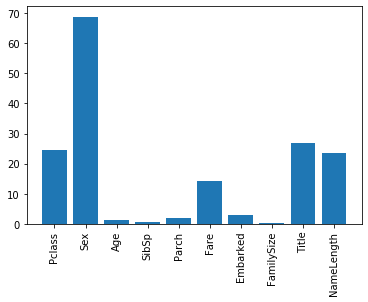

In [27]:
import numpy as np 
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

predictors = ['Pclass','Sex','Fare','Title']

alg = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(n_splits=3, shuffle=False, random_state=1)

predictions = []

for train,test in kf.split(titanic[predictions]):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)


/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

0.28058361391694725


/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
titles = titanic_test['Name'].apply(get_title)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test['Title'] = titles

print(pd.value_counts(titanic_test['Title']))
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [40]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg,predictors in algorithms:
    alg.fit(titanic[predictors],titanic['Survived'])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    
predictions = (full_predictions[0] * 3 + full_predictions[1]) /4
predictions

/home/houser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.11608614, 0.47313164, 0.12527404, 0.1305029 , 0.52004313,
       0.14392416, 0.63984338, 0.18138299, 0.67782331, 0.12095368,
       0.12054309, 0.21154493, 0.91148439, 0.10814111, 0.89180609,
       0.87818912, 0.16501956, 0.13910404, 0.5399017 , 0.55188899,
       0.22474622, 0.53695165, 0.9068644 , 0.39533669, 0.88099057,
       0.10288684, 0.9105501 , 0.13737152, 0.31376952, 0.12631622,
       0.11615631, 0.18430576, 0.54919197, 0.49415142, 0.42910389,
       0.14215743, 0.50825225, 0.5241706 , 0.13230706, 0.2822251 ,
       0.11076129, 0.47224518, 0.09914069, 0.83492475, 0.90028243,
       0.14946376, 0.31905675, 0.13752018, 0.89021873, 0.53830769,
       0.36218206, 0.17945765, 0.83411369, 0.87864985, 0.17768222,
       0.13743944, 0.10594414, 0.12307288, 0.12054944, 0.912131  ,
       0.13115383, 0.15454244, 0.13002402, 0.66586832, 0.66161482,
       0.87338586, 0.67298302, 0.29010609, 0.35826281, 0.84875191,
       0.66211577, 0.12688448, 0.55224756, 0.37379731, 0.91064